In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.stats as stats


In [2]:
# load data
data_analysis = pd.read_csv('cleaned_smmh.csv')
data_analysis.head()

,Age,Gender,Relationship status,Occupation,Affiliated organizations,Social media use,Platforms,Hours per day,Frequency social media use w/o purpose,Frequency distracted by social media,...,Distracted easily,Level worriedness,Difficulty Concentrating,Frequency comparisons to others social media,Feelings about comparisons,Frequency seeking validation from social media,Frequency of depressed feelings,Fluctuation of interest daily activities,Issues sleeping,Total score
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,...,5,2,5,2,3,2,5,4,5,43
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,...,4,5,4,5,1,1,5,4,5,43
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,...,2,5,4,3,3,1,4,2,5,35
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,...,3,5,3,5,1,2,4,3,2,35
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,...,4,5,5,3,3,3,4,4,1,44


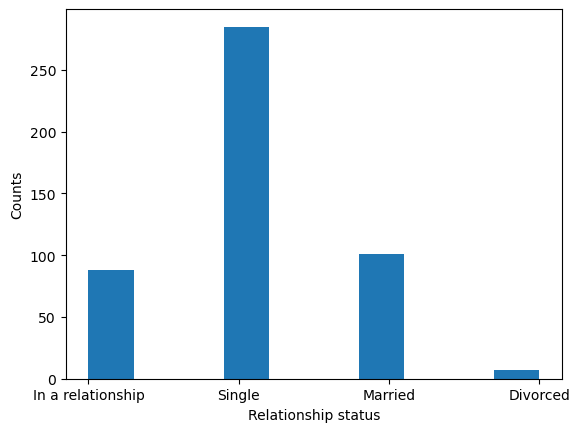

In [3]:
plt.hist(data_analysis['Relationship status'])
plt.xlabel('Relationship status')
plt.ylabel('Counts')
plt.show()


In [4]:
# count each relationship status
relationship_counts = data_analysis['Relationship status'].value_counts()
print("Counts of each relationship status:")
print(relationship_counts)


Counts of each relationship status:
Relationship status
Single               285
Married              101
In a relationship     88
Divorced               7
Name: count, dtype: int64


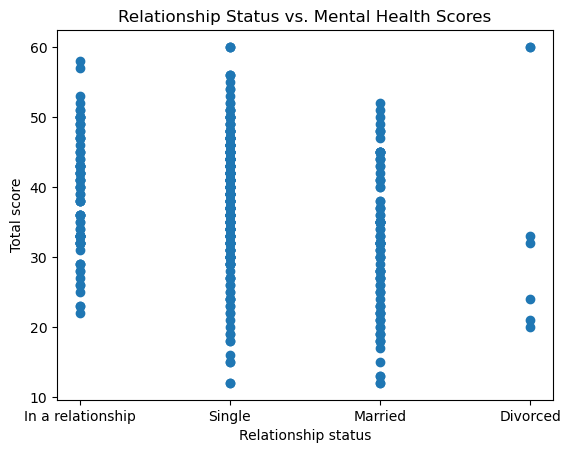

In [5]:
# Scatter plot
plt.scatter(data_analysis['Relationship status'], data_analysis['Total score'])
plt.xlabel('Relationship status')
plt.ylabel('Total score')
plt.title('Relationship Status vs. Mental Health Scores')
plt.show()



In [6]:

# Calculate mean, median, mode Health Score
mean_total_score = data_analysis['Total score'].mean()
median_total_score = data_analysis['Total score'].median()
mode_total_score = data_analysis['Total score'].mode()

print("Total Score:", mean_total_score)
print("Median Total Score:", median_total_score)
print("Mode Total Score:", mode_total_score)

Total Score: 37.305613305613306
Median Total Score: 38.0
Mode Total Score: 0    32
Name: Total score, dtype: int64


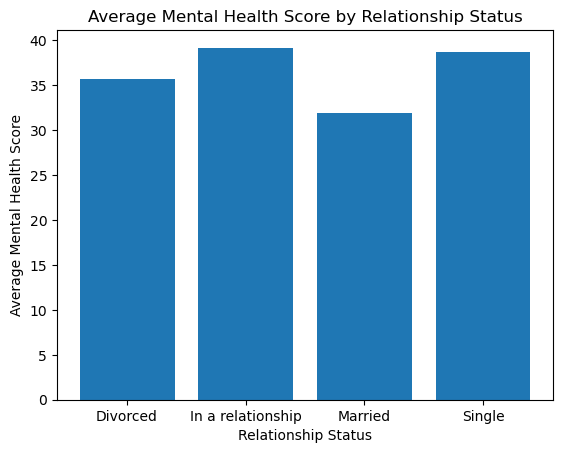

In [7]:
# Group the data by relationship status and calculate the average mental health score for each group
avg_mental_health_by_status = data_analysis.groupby('Relationship status')['Total score'].mean()

# Plot the average mental health score for each relationship status
plt.bar(avg_mental_health_by_status.index, avg_mental_health_by_status.values)
plt.xlabel('Relationship Status')
plt.ylabel('Average Mental Health Score')
plt.title('Average Mental Health Score by Relationship Status')
plt.show()

In [8]:
#extracting Relationship status and Total score
df = pd.read_csv('cleaned_smmh.csv')

column_indices = [2, -1] 

df_selected = df.iloc[:, column_indices]
print(df_selected)


    Relationship status  Total score
0     In a relationship           43
1                Single           43
2                Single           35
3                Single           35
4                Single           44
..                  ...          ...
476              Single           42
477             Married           35
478             Married           34
479              Single           37
480             Married           26

[481 rows x 2 columns]


<Axes: title={'center': 'Total score'}, xlabel='Relationship status'>

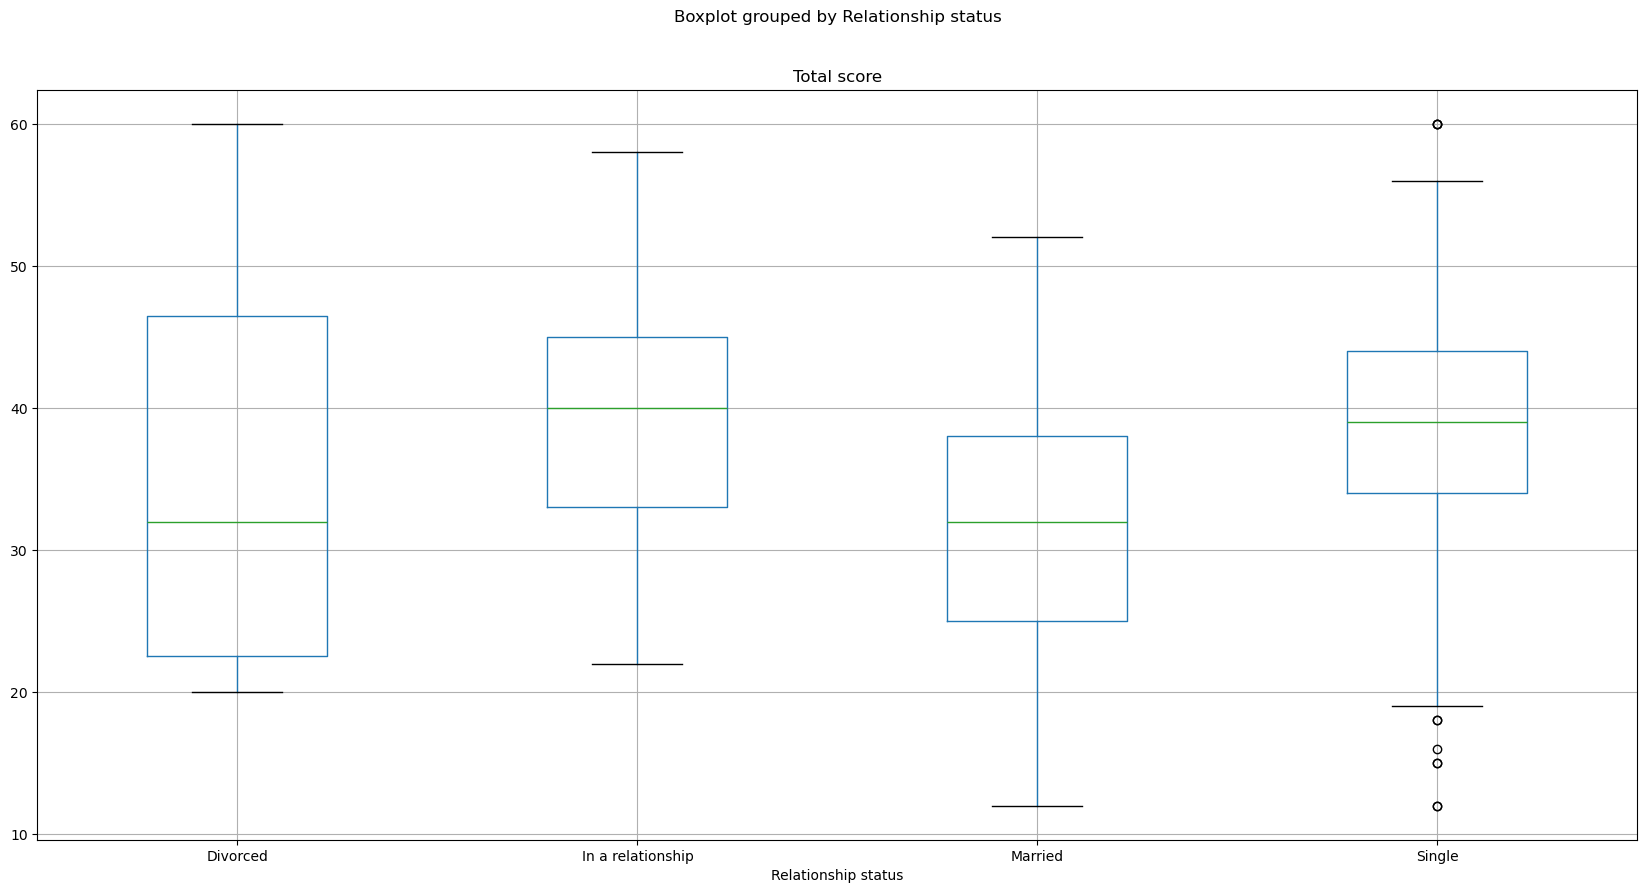

In [9]:
# Create a boxplot to compare means
df.boxplot("Total score", by="Relationship status", figsize=(20, 10))

In [10]:
grouped = df.groupby('Relationship status')


In [11]:
for group_name, group_data in grouped:
    print(f"Group: {group_name}")
    print(group_data['Total score']) 
    print()

Group: Divorced
19     32
134    21
143    24
154    33
176    20
238    60
367    60
Name: Total score, dtype: int64

Group: In a relationship
0      43
7      33
8      31
15     36
20     28
       ..
440    42
441    36
446    51
447    48
466    32
Name: Total score, Length: 88, dtype: int64

Group: Married
6      43
23     35
25     40
27     47
31     33
       ..
474    37
475    52
477    35
478    34
480    26
Name: Total score, Length: 101, dtype: int64

Group: Single
1      43
2      35
3      35
4      44
5      40
       ..
469    24
470    38
471    40
476    42
479    37
Name: Total score, Length: 285, dtype: int64



In [17]:
# Separate the 'Total score' column for each group
group1 = df[df['Relationship status'] == 'Single']['Total score']
group2 = df[df['Relationship status'] == 'In a relationship']['Total score']
group2 = df[df['Relationship status'] == 'Married']['Total score']
group2 = df[df['Relationship status'] == 'Divorced']['Total score']

In [18]:
# Perform the t-test
stats.f_oneway(group1, group2)



F_onewayResult(statistic=0.7913052133523263, pvalue=0.3744430594575481)